In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib

In [20]:
method = 'region_growing'
rpi = 'h2r2'
format = 'jpg'

path_to_processed = sorted(glob.glob('a_processed_images/'+ method + '/' + rpi + '/*.' + format))
path_to_original = sorted(glob.glob('annotated_masks/' + rpi + '/*.jpg'))
names = [pathlib.Path(x).stem for x in path_to_original]

path_to_final_mask = 'a_found_masks/' + method + '/' + rpi + '/'
print(names)

['hive2_rpi2_240420-033602Z', 'hive2_rpi2_240420-113302Z', 'hive2_rpi2_240421-041502Z', 'hive2_rpi2_240421-105302Z', 'hive2_rpi2_240421-152302Z', 'hive2_rpi2_240421-191402Z', 'hive2_rpi2_240422-001902Z', 'hive2_rpi2_240422-124302Z', 'hive2_rpi2_240422-212602Z', 'hive2_rpi2_240423-023002Z', 'hive2_rpi2_240423-091802Z', 'hive2_rpi2_240423-145702Z', 'hive2_rpi2_240423-200402Z', 'hive2_rpi2_240423-210202Z', 'hive2_rpi2_240423-211402Z', 'hive2_rpi2_240424-104902Z', 'hive2_rpi2_240424-134702Z', 'hive2_rpi2_240424-140002Z', 'hive2_rpi2_240425-164102Z', 'hive2_rpi2_240426-053202Z', 'hive2_rpi2_240426-054302Z', 'hive2_rpi2_240426-104202Z', 'hive2_rpi2_240426-150702Z', 'hive2_rpi2_240427-180602Z', 'hive2_rpi2_240428-125002Z']


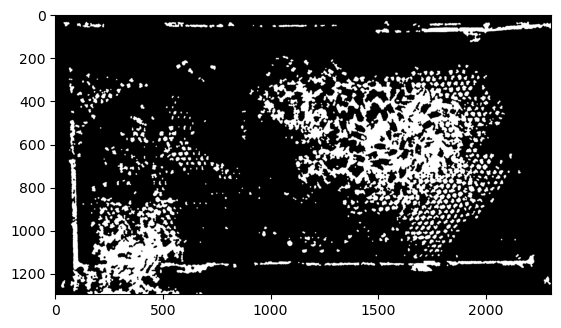

In [5]:
plt.imshow(cv2.imread(path_to_processed[0]))

In [48]:
processed_imgs = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in path_to_processed]
n = 0
for mask in processed_imgs:
    final_mask = np.ones_like(mask)*255
    if method == 'ilastik':
        mask = cv2.threshold(mask, 1.5, 255, cv2.THRESH_BINARY)[1]
        mask = ~mask
    img_contour = (mask).astype(np.uint8) #convert to uint8 because findContours only accepts uint8
    contours, _ = cv2.findContours(img_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
    contours = [x for x in contours if cv2.contourArea(x) > 120000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2] #get the 2 biggest contour
    img_contour = cv2.cvtColor(img_contour, cv2.COLOR_GRAY2BGR) #convert to BGR because drawContours only accepts BGR
    cv2.drawContours(final_mask, contours, -1, (0), -1) #draw the biggest contour
    cv2.imwrite(path_to_final_mask + names[n] + '_final_mask.jpg', final_mask)
    n += 1

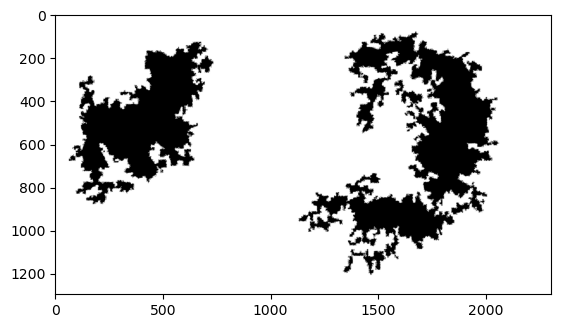

In [47]:
plt.imshow(cv2.imread(path_to_final_mask + names[5] + '_final_mask.jpg'))

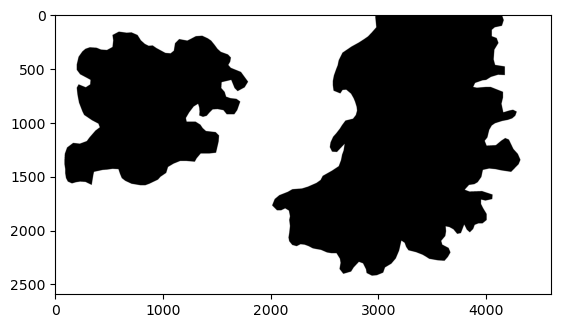

In [23]:
plt.imshow(cv2.imread(path_to_original[5]))

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------

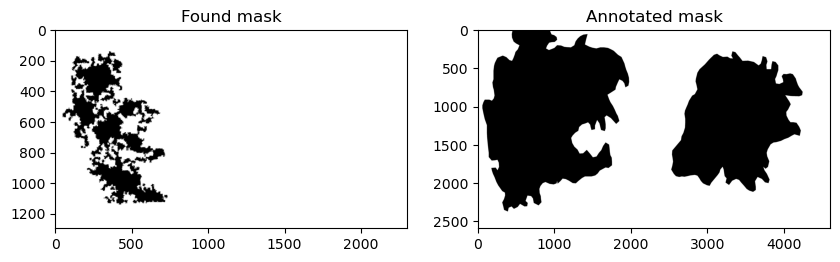

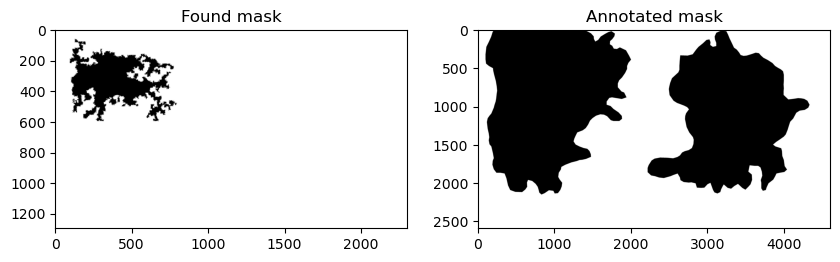

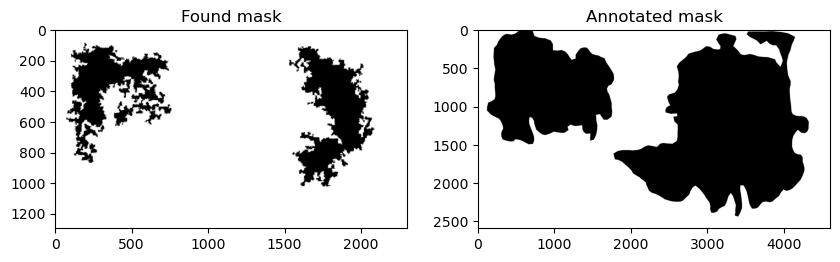

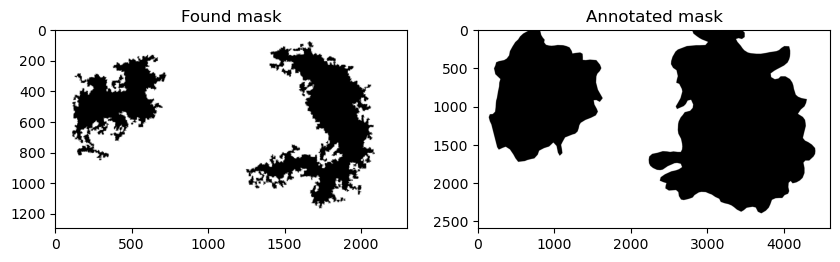

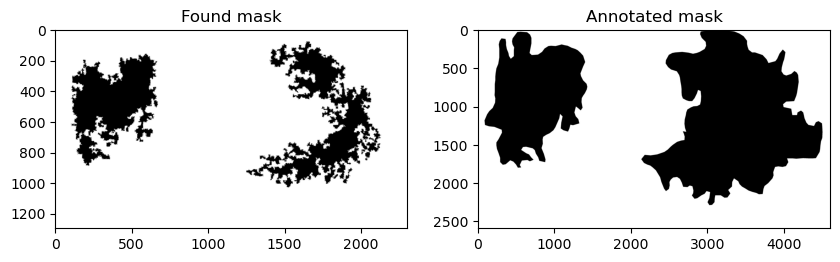

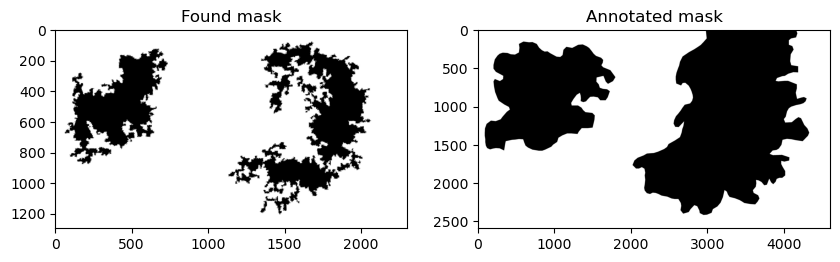

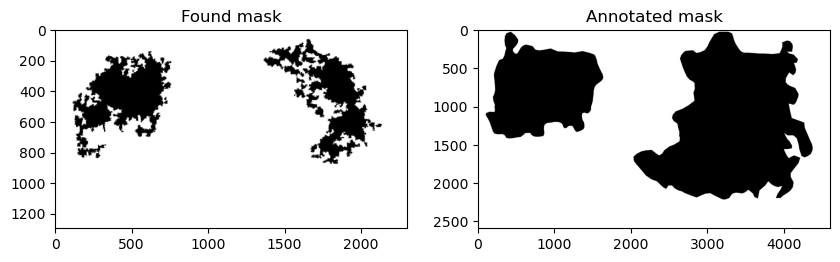

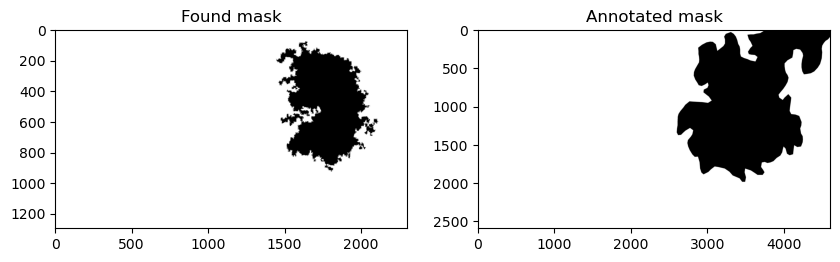

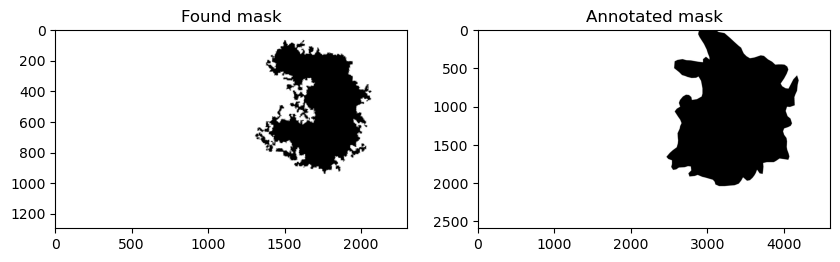

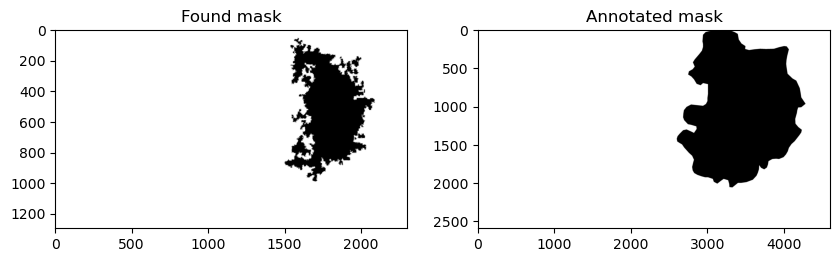

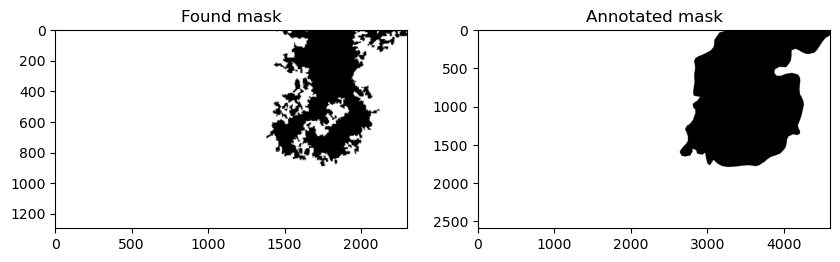

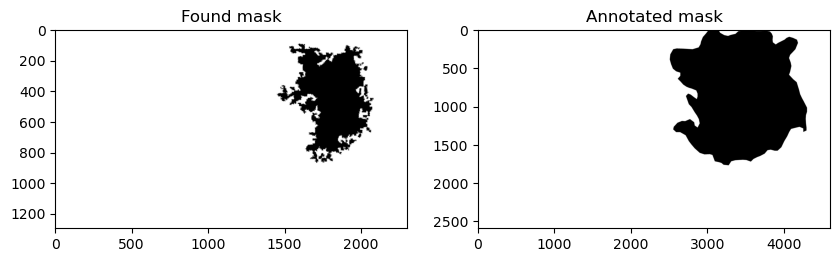

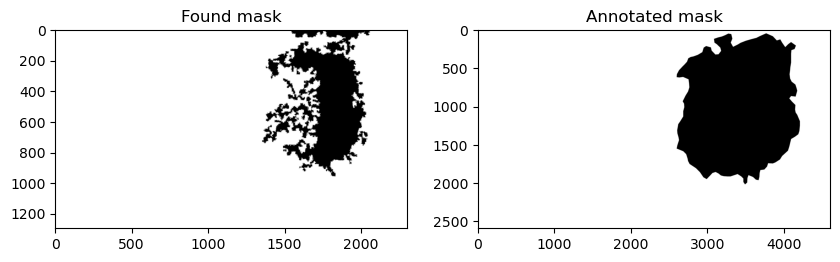

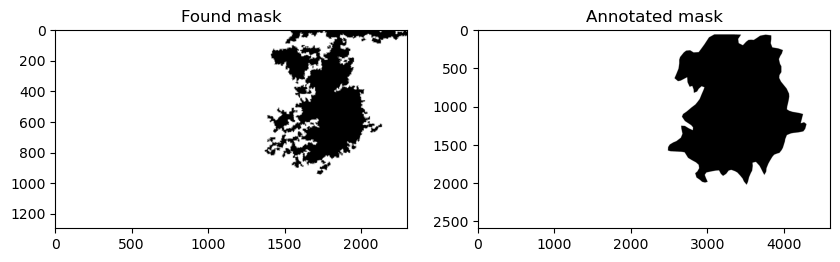

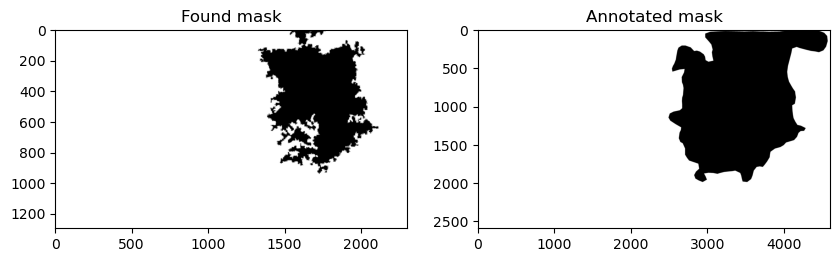

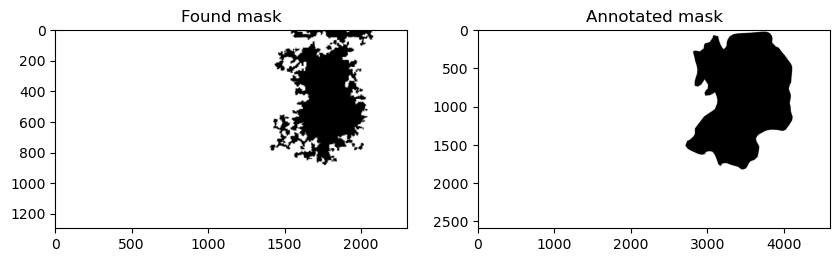

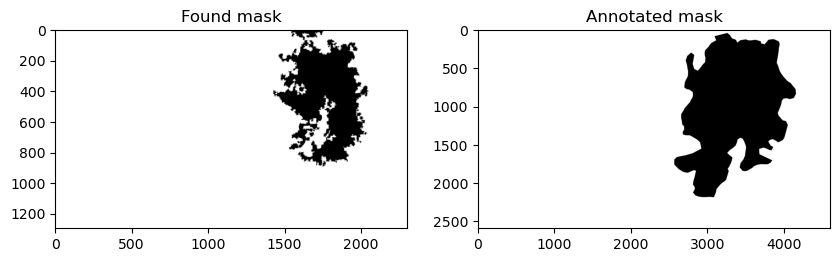

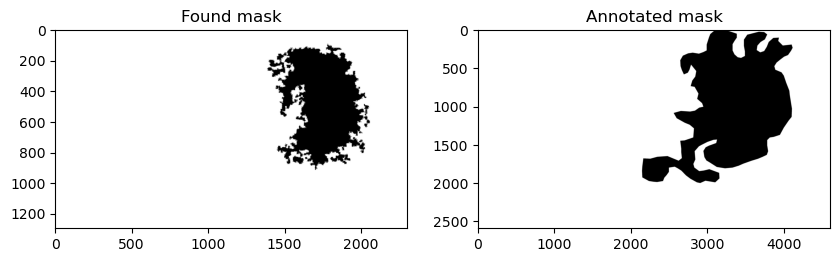

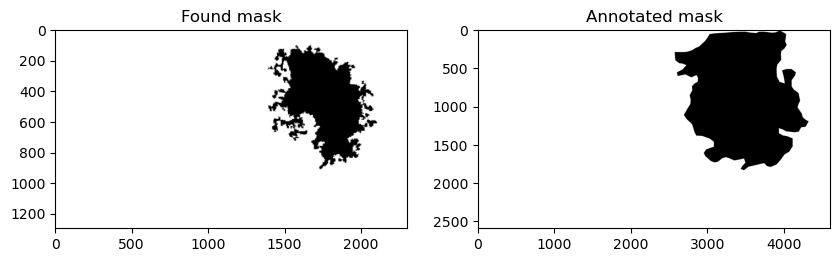

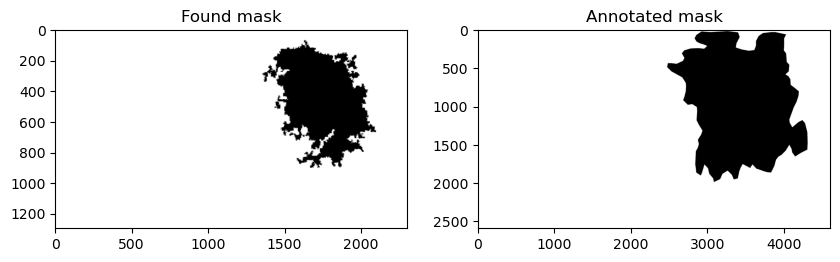

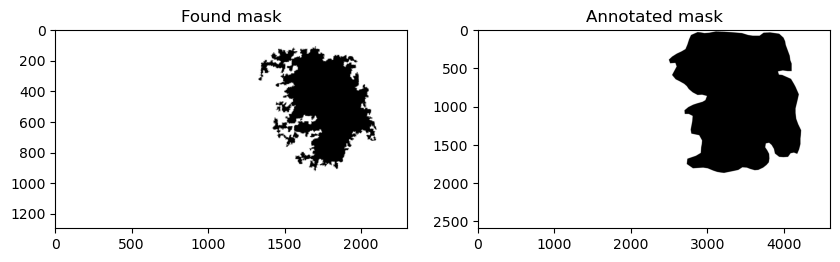

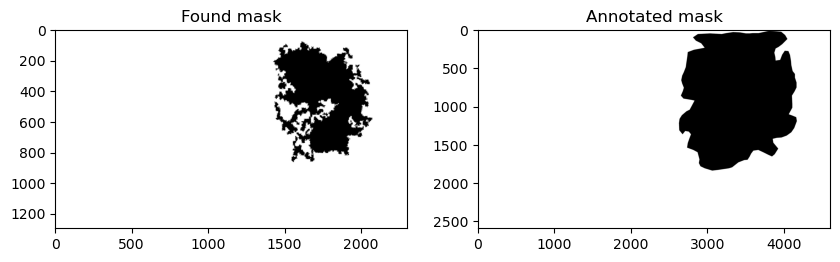

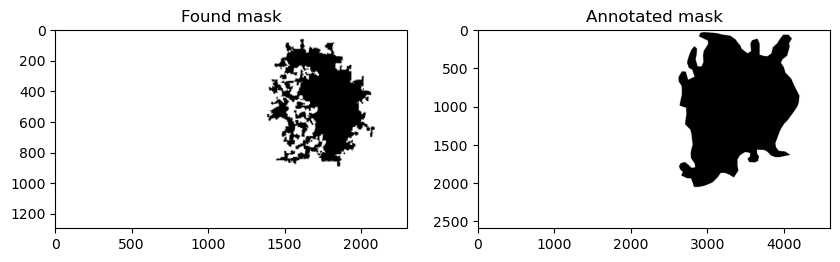

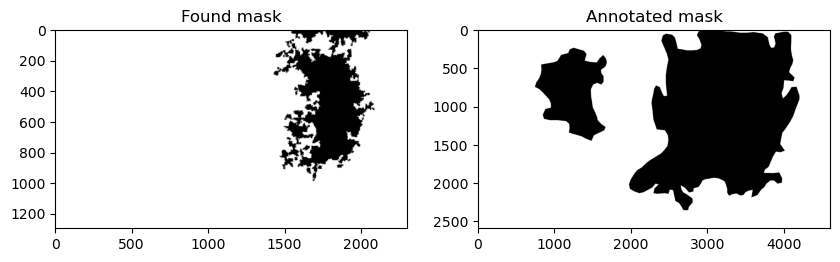

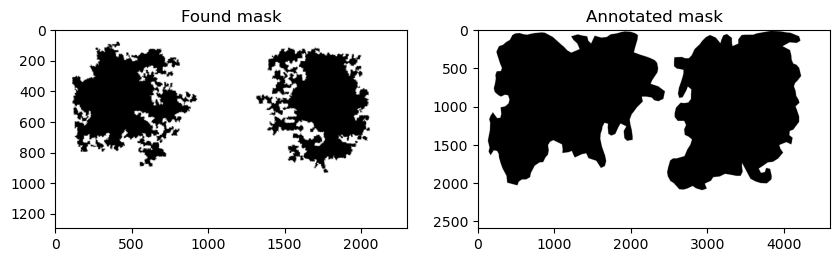

In [49]:
method = 'region_growing'
rpi = 'h2r2'
format = 'jpg'

path_to_processed = sorted(glob.glob('a_processed_images/'+ method + '/' + rpi + '/*.' + format))
path_to_original = sorted(glob.glob('annotated_masks/' + rpi + '/*.jpg'))
names = [pathlib.Path(x).stem for x in path_to_original]

path_to_final_mask = 'a_found_masks/' + method + '/' + rpi + '/'
# for all imges, show the found mask and the annotated mask
for i in range(len(names)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.imread(path_to_final_mask + names[i] + '_final_mask.jpg'))
    ax[0].set_title('Found mask')
    ax[1].imshow(cv2.imread(path_to_original[i]))
    ax[1].set_title('Annotated mask')
    plt.show()